In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import scipy as stats
from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingRegressor
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Problem statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), Complete Games(CG) and Errors(E)

Output: Number of predicted wins (W)

In [3]:
# import dataset

df = pd.read_csv('baseball.csv')

df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

# Lets start with Exploratory Data Analysis (EDA)

In [7]:
# dataset has 30 rows and 17 columns as seen above

In [8]:
# lets check data types of the dataset

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# all columns have integers as datatype except 'ERA' which has float, but all have numerical values hence no further processingis needed.

In [11]:
# Checking overview of daaset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
# check uniqueness of values (whether duplicates are present).

df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [13]:
# checking null values

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

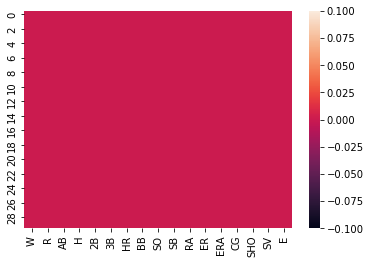

In [15]:
#Lets visualize null values by heatmap

sns.heatmap(df.isnull())

In [17]:
# check columns

df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [18]:
# unique values in TARGET column

df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [20]:
# Lets check statistical details of datset

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

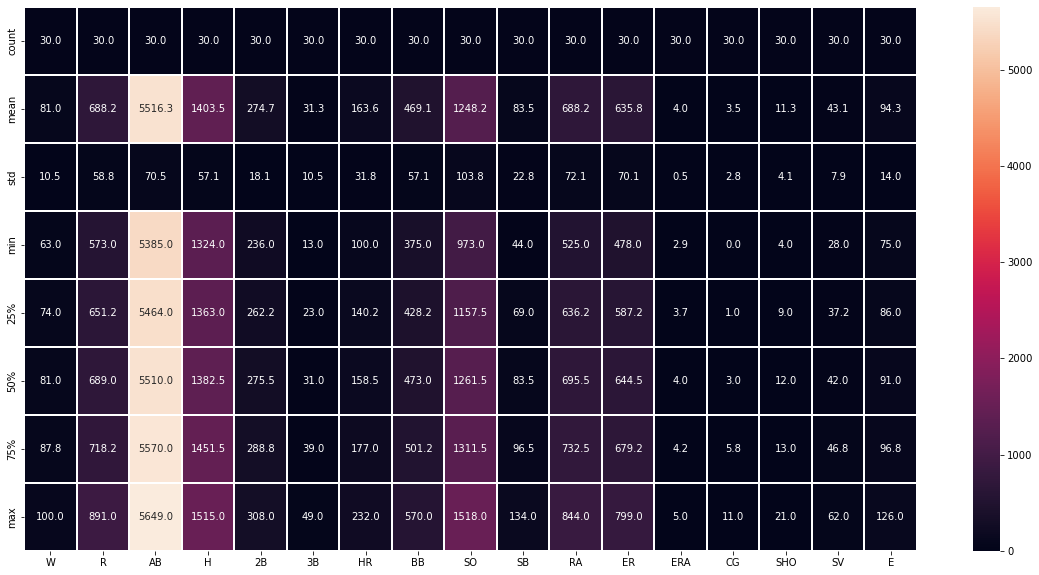

In [21]:
# Visualizing of the columns using Heatmap

plt.figure(figsize = (20, 10))

sns.heatmap(df.describe(), linewidths = 0.30, fmt = '0.1f', annot = True)

# Start with Data visualization.

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='W', ylabel='Count'>

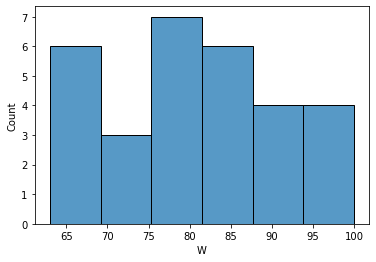

In [23]:
# Histogram of target variable

sns.histplot(df["W"])

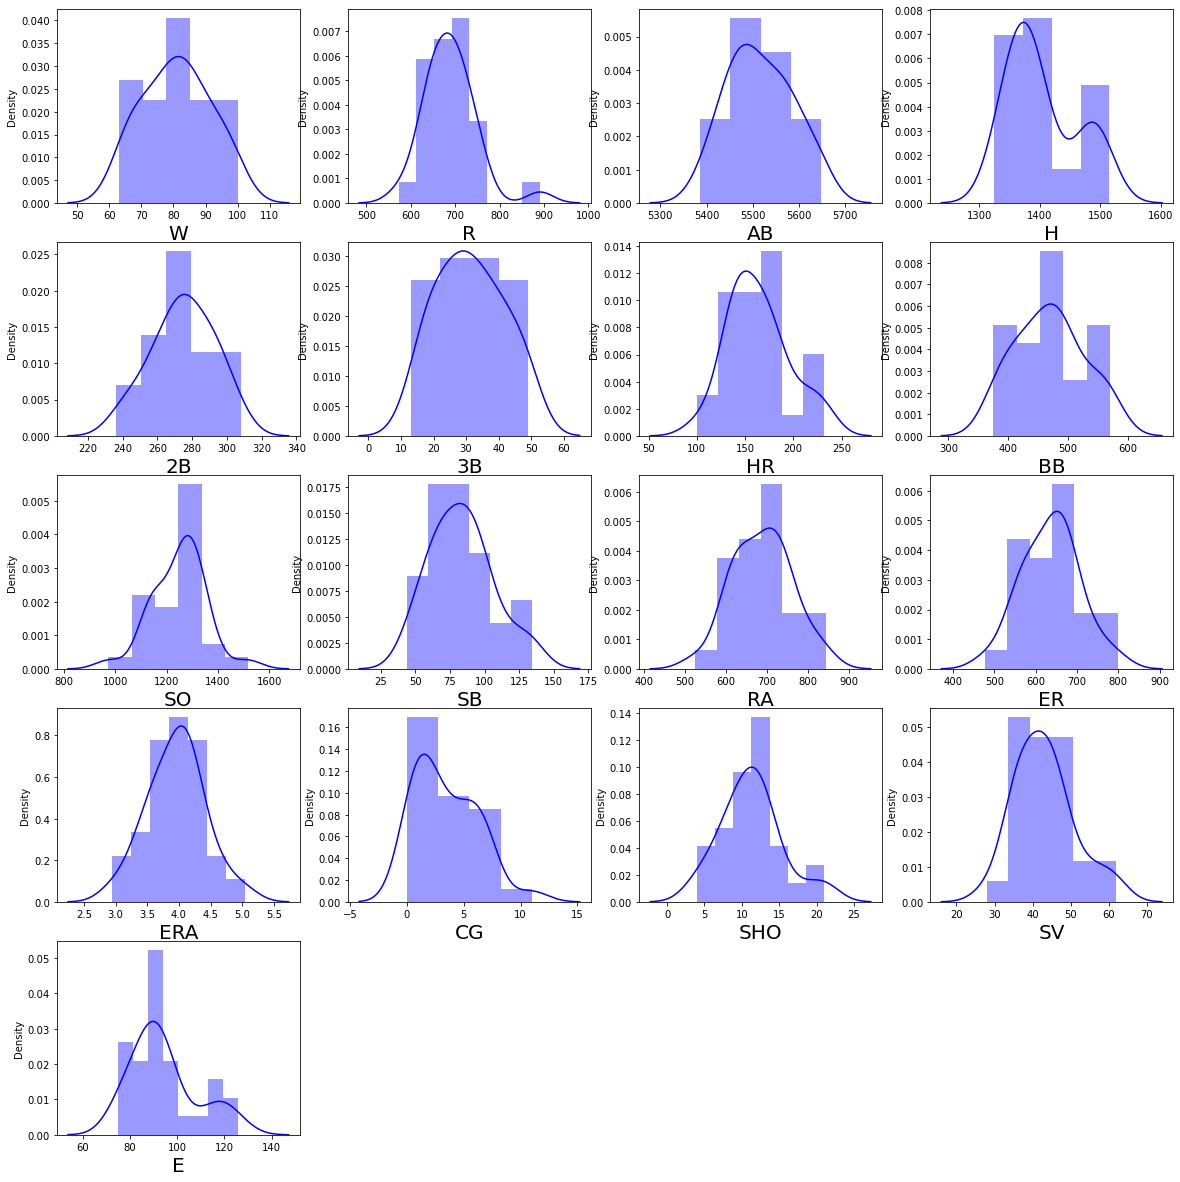

In [25]:
# Checking how the data has been distriubted in each column

plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(6, 4, plotnumber)
        sns.distplot(df[column], color = 'b')
        plt.xlabel(column, fontsize = 20)
        plotnumber += 1

plt.show()

# Checking for outliers

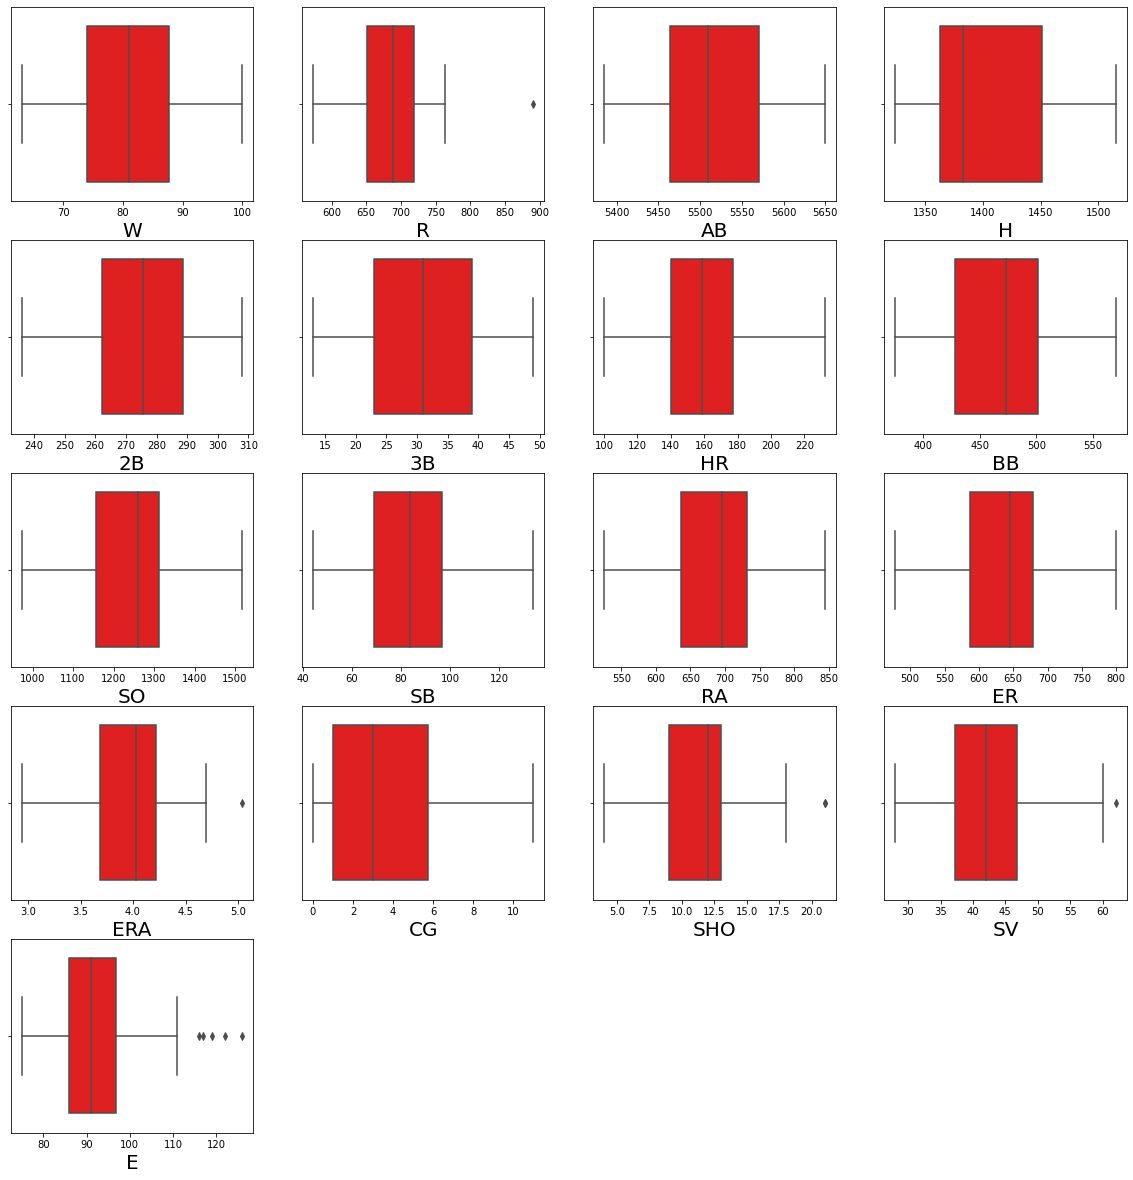

In [26]:
plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(6, 4, plotnumber)
        sns.boxplot(df[column], color = 'r')
        plt.xlabel(column, fontsize = 20)
        plotnumber += 1

plt.show()

In [27]:
# outliers are present in the columns 'R', 'ERA', 'SHO', 'SV', and 'E'. We will remove these outliers using Zscore method

# Bivariate Analysis

Text(0, 0.5, 'Errors')

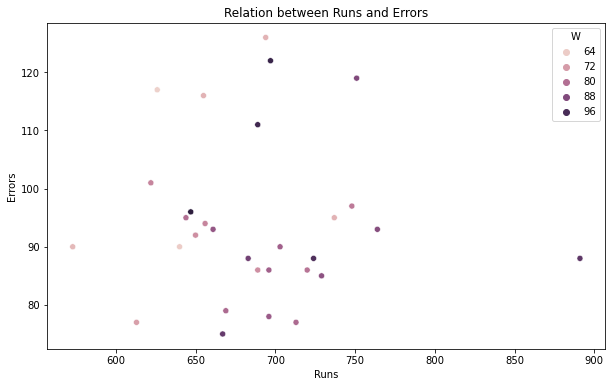

In [28]:
# Check relation between runs and errors

plt.figure(figsize = [10, 6])

plt.title('Relation between Runs and Errors')

sns.scatterplot(df['R'], df['E'], hue = df["W"]);

plt.xlabel("Runs")

plt.ylabel("Errors")

In [ ]:
# We do not see any corelation betweeen these two.

Text(0, 0.5, 'Wins')

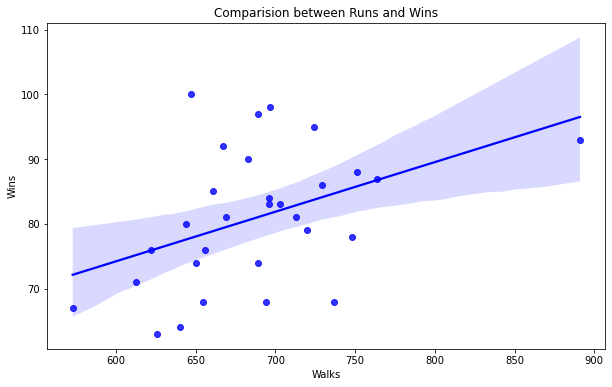

In [30]:
#Checking the relation between Runs and Wins

plt.figure(figsize = (10, 6))

plt.title('Comparision between Runs and Wins')

sns.regplot(df['R'], df['W'], color = 'blue')

plt.xlabel('Walks')

plt.ylabel('Wins')

In [32]:
# Here we can see some linear corelation between Runs & Wins. As the runs increase wins also increase

Text(0, 0.5, 'Wins')

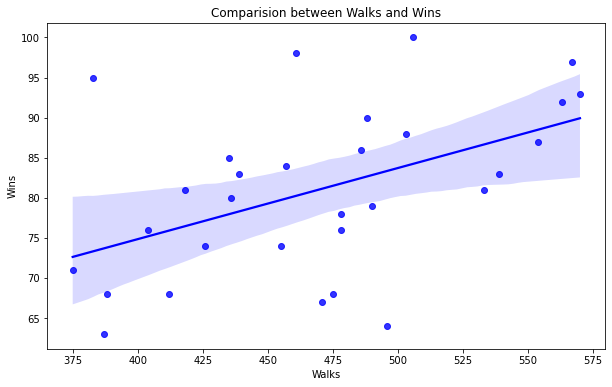

In [33]:
#checking the comparision between wins and walk

plt.figure(figsize = (10, 6))

plt.title('Comparision between Walks and Wins')

sns.regplot(df['BB'], df['W'], color = 'Blue')

plt.xlabel('Walks')

plt.ylabel('Wins')

In [34]:
# Here winning rate of the team increases as the number of Walks increases.

# Correlation between the target variable and independent variables

In [36]:
df_corr = df.corr()

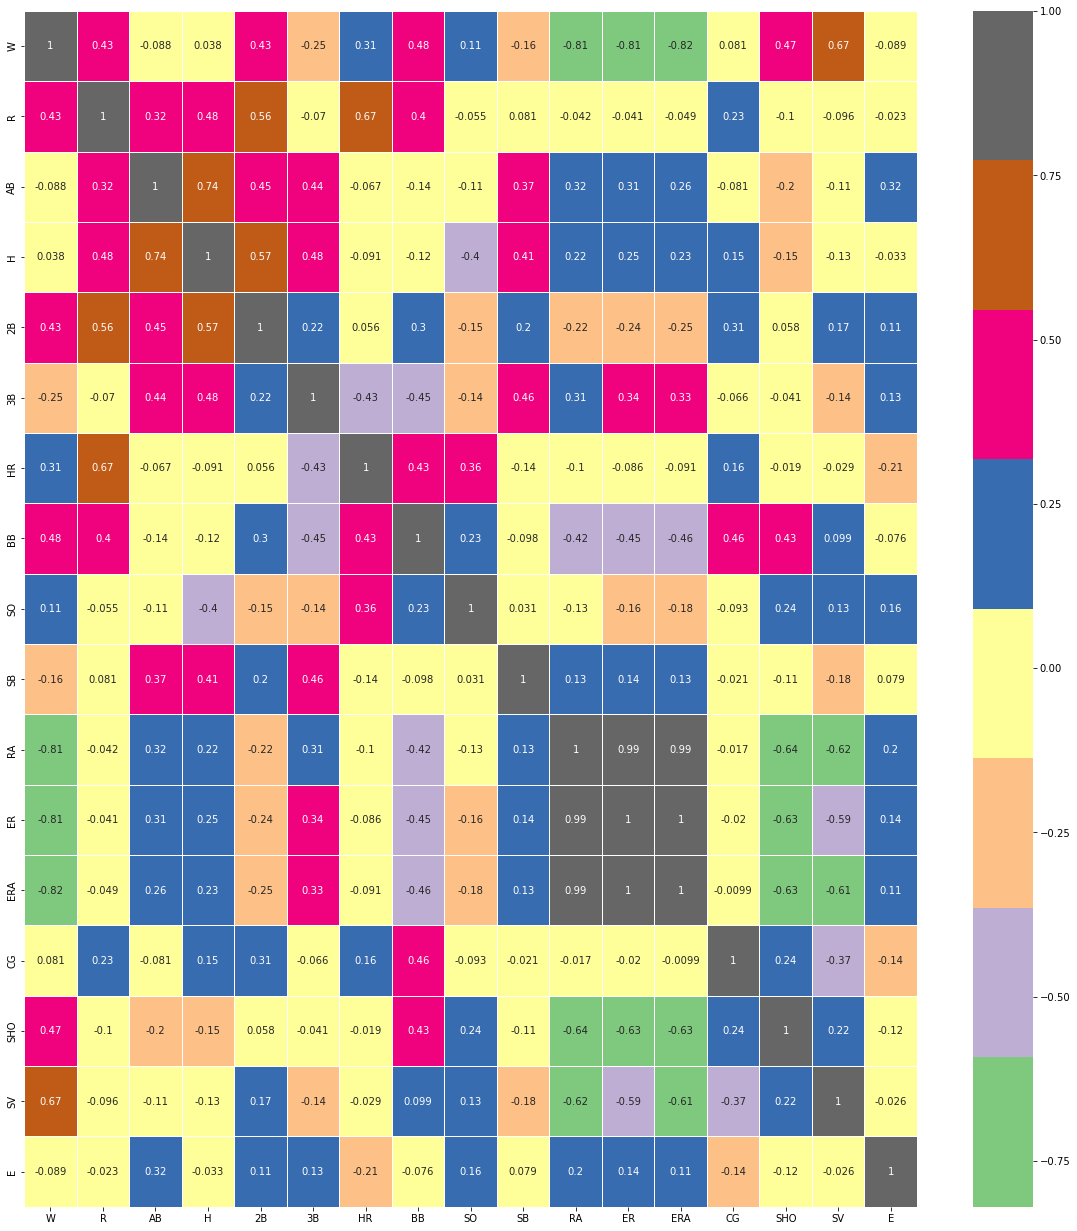

In [38]:
plt.figure(figsize=(20,22))

sns.heatmap(df_corr, annot = True, linewidth = 1, cmap = 'Accent')

plt.show()

In [ ]:
# Above heatmap shows VERY high corelation in between 'RA', 'ERA', 'ER'.

# good relation with 'H' & 'AB', 'R'  & 'HR', 'W' & 'SV'.

# There is a negative relationship between 'W' with 'ER', 'ERA' & 'RA'.

# Also 'SHO' & 'SV' has negative relationship with 'RA', 'ER', 'ERA'

# Multivariate Analysis

In [41]:
# Checking the pairwise relation in the dataset.

sns.pairplot(df, hue = 'W', palette = 'Accent')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026369B2D3A0> (for post_execute):


KeyboardInterrupt: 

# Visualize the correlation between target and features using bar plot

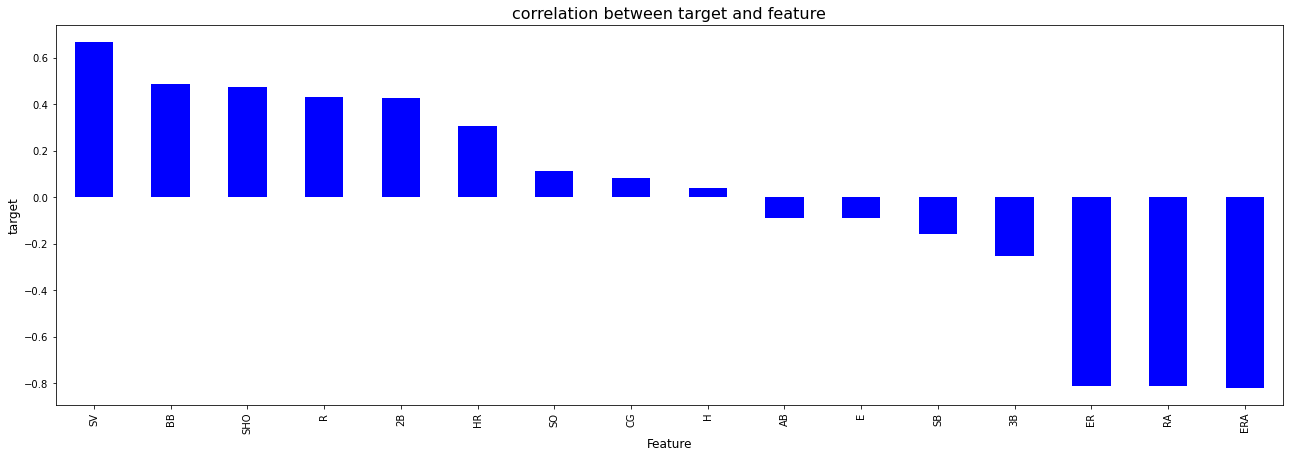

In [43]:
plt.figure(figsize = (22, 7))

df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'b')

plt.xlabel('Feature',fontsize = 12)

plt.ylabel('target',fontsize = 12)

plt.title('correlation between target and feature', fontsize = 16)

plt.show()

In [44]:
# Here we can see 'H' & 'CG' have very less corelation with 'W', hence we can drop those 2 columns.

In [45]:
df.drop('H', axis = 1, inplace = True)

df.drop('CG', axis = 1, inplace = True)

df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [46]:
df.shape

(30, 15)

# Removing outliers by Zscore method

In [47]:
df.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'SHO', 'SV', 'E'],
      dtype='object')

In [48]:
# Columns having outliers

f_out = df[["R","ERA","SHO","SV","E"]]

In [51]:
z=np.abs(zscore(f_out))

z

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


In [52]:
# Create new df

new_df = df[(z < 3).all(axis = 1)]

new_df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [53]:
df.shape

(30, 15)

In [54]:
new_df.shape

(29, 15)

In [56]:
# Checking for Skewness

new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# using yeo-johnson method to remove skewness

In [58]:
skewed_features = ["SHO", "SV", "E"]

In [59]:
scaler = PowerTransformer(method='yeo-johnson')

In [60]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)

new_df[skewed_features].head()

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [61]:
# Check the skewness after transformation

new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [62]:
# Above we can see the removed Skewness.

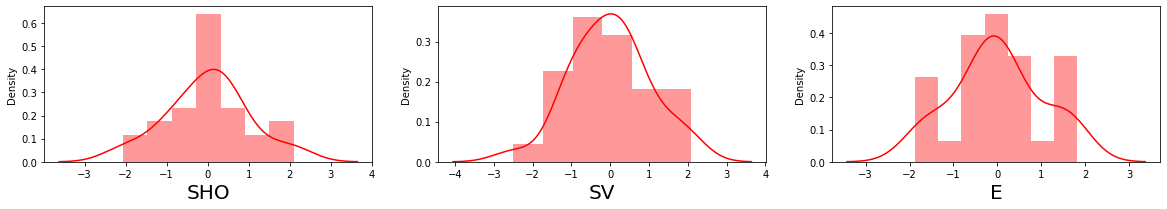

In [63]:
# After removing let's check how the data has been distributed in each column.

features_skewed = ["SHO", "SV", "E"]

plt.figure(figsize=(20, 20), facecolor = 'white')

plotnumber = 1

for column in new_df[features_skewed]:
    if plotnumber <= 17:
        ax = plt.subplot(6, 3, plotnumber)
        sns.distplot(new_df[column], color = 'r')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.show()

# Lets do the Data Preprocessing
 
 Separating the independent and target variables into x and y

In [64]:
x = new_df.drop('W', axis = 1)
y = new_df['W']

In [65]:
print(x.shape)

print(y.shape)

(29, 14)
(29,)


In [67]:
# Lets do Standard Scalarization

In [68]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


# Check Variance Inflation Factor & solve multicollinearity

In [69]:
# Find VIF in each scaled column 

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


In [70]:
# The VIF value is more than 10 in columns "AB", "RA", "ER", "ERA" hence we drop these one by one.

x.drop('ER', axis = 1, inplace = True)

In [71]:
# Check the VIF after removing 'ER' column

vif = pd.DataFrame()

vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


In [ ]:
# Multicolinearity still exists, Lets drop next column 'RA'

In [72]:
x.drop('RA', axis = 1, inplace = True)

In [73]:
vif = pd.DataFrame()

vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


# Now Multi colinearity has been solved, Start building MODEL.

In [76]:
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,0.236737,-1.149165,-0.540820


In [ ]:
# RANDOM STATE value finding. Split test and train in 30% & 70% respectively.

In [80]:
maxAccu=0
maxRS=0
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(' Max r2 score is ', maxAccu, ' at Random_state ', maxRS)

 Max r2 score is  0.9291790579976075  at Random_state  50


# So now R2 score is 93% at RS = 50

In [79]:
# TEST - TRAIN -SPLIT

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.30, random_state = maxRS)

# MODELING - Linear Regression

In [83]:
# Check R2 score for Linear Regression

LR = LinearRegression()

LR.fit(x_train, y_train)

# prediction for LR

predLR = LR.predict(x_test)

print('R2_score:', r2_score(y_test, predLR))

# Mean Absolute Error (MAE)

print('MAE:', metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)

print('MSE:', metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.9291790579976075
MAE: 2.462786598789849
MSE: 10.16324234365198
RMSE: 3.1879840563672803


In [84]:
# LR with Ridge

paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.26], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = Ridge()

clf = GridSearchCV(ridge, paramsRidge)

clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sag'}


In [85]:
# Checking R2 score for Ridge regressor

ridge = Ridge(alpha = 10.26, solver = 'sag')

ridge.fit(x_train, y_train)

ridge.score(x_train, y_train)

pred_ridge = ridge.predict(x_test)

print('R2_Score:', r2_score(y_test, pred_ridge))

print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))

print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224492712756312
MAE: 4.392716340173992
MSE: 25.479625564099543
RMSE: 5.047734696286993


# LR with LASSO

In [86]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0, 100))}

lasso=Lasso()

clf = GridSearchCV(lasso, parameters)

clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [95]:
lasso = Lasso(alpha = 1, random_state = 0)

lasso.fit(x_train, y_train)

lasso.score(x_train, y_train)

pred_lasso = lasso.predict(x_test)

print('R2_Score:', r2_score(y_test, pred_lasso))

print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))

print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

print('Cross_Validaton_Score', cross_val_score(lasso, x, y, cv = 5).mean())

R2_Score: 0.8642951302468398
MAE: 3.8253497504300955
MSE: 19.474486493959688
RMSE: 4.412990651922989
Cross_Validaton_Score 0.5206537019436123


In [ ]:
# Here we get R2 score of 86%

# Random forest Regressor

In [91]:
# Check R2 score for  Random Forest Regressor

RFR = RandomForestRegressor()

RFR.fit(x_train, y_train)

# Prediction

pred_RFR = RFR.predict(x_test)

print('R2_Score:', r2_score(y_test, pred_RFR))

# Mean Absolute Error (MAE)

print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)

print('MSE:', metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Check CV score for Random Forest Regression

print('Cross_Validaton_Score' ,cross_val_score(RFR, x, y, cv = 5).mean())

R2_Score: 0.6620503871300756
MAE: 6.025555555555556
MSE: 48.49785555555557
RMSE: 6.964040174751691
Cross_Validaton_Score -0.6851185880535591


# Gradient Boosting Regressor

In [93]:
# Check R2 score for  Gradient Boosting Regressor

GB = GradientBoostingRegressor()

GB.fit(x_train, y_train)

# prediction

predGB = GB.predict(x_test)

print('R2_Score:', metrics.r2_score(y_test, predGB))

print('MAE:', metrics.mean_absolute_error(y_test, predGB))

print('MSE:', metrics.mean_squared_error(y_test, predGB))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Check CV score for GradientBoosting Regressor

print('Cross_Validaton_Score', cross_val_score(GB, x, y, cv = 5).mean())

R2_Score: 0.49806416842884527
MAE: 6.532798561499295
MSE: 72.03089019979137
RMSE: 8.487101401526399
Cross_Validaton_Score -1.2727475696182862


In [96]:
 # LASSO regression is best fitting model according to R2 and cross validation score. 

# HYPER parameters tuning

In [97]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [98]:
GCV = GridSearchCV(Lasso(), parameters, cv = 5)

In [99]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [100]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 6,
 'selection': 'random',
 'tol': 100}

# MODEL FINALIZATION

In [102]:
BASEBALL_WINS = Lasso(alpha=1.0, fit_intercept="bool", max_iter = 2, selection = 'random', tol = 100)

BASEBALL_WINS.fit(x_train, y_train)

pred = BASEBALL_WINS.predict(x_test)

print('R2_Score:', r2_score(y_test, pred_lasso) * 100)

print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 86.42951302468398
RMSE value: 4.412990651922989


# Hence we find best R2 score of 86.42% 

# Saving the model

In [104]:
joblib.dump(BASEBALL_WINS,'BASEBALL_WINS.pkl')

['BASEBALL_WINS.pkl']

In [105]:
# Predicting

model=joblib.load('BASEBALL_WINS.pkl')

#Prediction
prediction = model.predict(x_test)
prediction

array([74.90007744, 83.88559831, 75.82979228, 87.56569928, 74.38678667,
       69.14296003, 85.56028603, 88.77401232, 93.51057208])

In [106]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8
Predicted,74.900077,83.885598,75.829792,87.565699,74.386787,69.14296,85.560286,88.774012,93.510572
Original,68.000000,78.000000,74.000000,88.000000,68.000000,64.00000,92.000000,90.000000,100.000000
